<a href="https://colab.research.google.com/github/federto/Sprint-01---02-/blob/main/Sprint__02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anyone AI - Project III

# Home Credit Default Risk


You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all togheter. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## 1. Introduction

This is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

We will use [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `application_train.csv`: Training dataset you must use to train and find the best hyperparameters on your model.
- `application_test.csv`: Test dataset, use it only when you are done choosing the model and the parameters.
- `HomeCredit_columns_description.csv`: This file contains descriptions for the columns in train and test datasets.


**Don't change anything in this cell, just make it run correctly**

In [ ]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
!gdown 1NXzAquurYrTSxMv6sEsWyDdty5teVg0r
!gdown 1k0rH0x2rAhHki9urSjVNS8xLwt3P-KPp
!gdown 136vZHxiyLKsyLl2iAJoSNZQQW9mZ__1J

Downloading...
From: https://drive.google.com/uc?id=1NXzAquurYrTSxMv6sEsWyDdty5teVg0r
To: /content/application_test.csv
100% 50.2M/50.2M [00:00<00:00, 78.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k0rH0x2rAhHki9urSjVNS8xLwt3P-KPp
To: /content/application_train.csv
100% 117M/117M [00:02<00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=136vZHxiyLKsyLl2iAJoSNZQQW9mZ__1J
To: /content/HomeCredit_columns_description.csv
100% 24.6k/24.6k [00:00<00:00, 48.3MB/s]


1.1. Load the training and test datasets using pandas `read_csv()` function. Assign them to `app_train` and `app_test` variables respectively.

In [ ]:
### Complete in this cell: Loading the dataset
app_train = pd.read_csv("application_train.csv", index_col=False)
app_test = pd.read_csv("application_test.csv", index_col=False)

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if app_train.shape == (215257, 123):
  print('Success: app_train shape is correct!')
else:
  raise ValueError('Train dataset shape is incorrect, please review your code')

if isinstance(app_train, pd.DataFrame):
  print('Success: app_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if app_test.shape == (92254, 123):
  print('Success: app_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(app_test, pd.DataFrame):
  print('Success: app_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!


### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1.2. Print how many samples do we have in our train and test datasets.

In [ ]:
### Complete in this cell: shape of the dataset
print("app_test shape : ", app_test.shape)
print("app_train shape : ", app_train.shape)

app_test shape :  (92254, 123)
app_train shape :  (215257, 123)


1.3. List all columns in the train dataset.

In [ ]:
### Complete in this cell: Show all columns in the training dataset 
for col in app_train.columns:
  print(col)

Unnamed: 0
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGARE

1.4. Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [ ]:
### Complete in this cell: show first 5 records in a transposed table
app_train.head(5)
app_train_tranpose = app_train.T

In [ ]:
app_train_tranpose 

,0,1,2,3,4,5,6,7,8,9,...,215247,215248,215249,215250,215251,215252,215253,215254,215255,215256
Unnamed: 0,187399,84777,268140,270686,33785,220690,39819,305532,61889,124932,...,281726,277289,192656,213016,133138,202992,262129,103024,147629,263388
SK_ID_CURR,317244,198357,410700,413785,139141,355660,146117,453987,171783,244882,...,426351,421313,323416,346846,254416,335324,403429,219587,271174,404958
TARGET,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,F,F,M,F,F,M,M,...,M,F,F,F,F,F,F,M,F,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

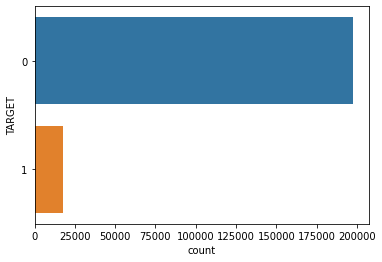

In [ ]:
### Complete in this cell: show distribution of target variable
sns.countplot(data = app_train, y = "TARGET")

In [ ]:
# 
val_target_perc = app_train["TARGET"].value_counts(normalize = True)
val_target_count = app_train["TARGET"].value_counts()
val_target_table = pd.concat([val_target_count, val_target_perc], axis=1)
val_target_table.columns = ["Total Count", "Total %"]
val_target_table

,Total Count,Total %
0,197882,0.919283
1,17375,0.080717


1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [ ]:
### Complete in this cell: show number of columns per data type
app_train.dtypes.value_counts()

float64    65
int64      42
object     16
dtype: int64

1.7. For categorical variables, show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [ ]:
### Complete in this cell: show number of unique values per categorical column
app_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [ ]:
### Complete in this cell: checking missing data

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
       
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 123 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,150393,69.9
COMMONAREA_AVG,150393,69.9
COMMONAREA_MODE,150393,69.9
NONLIVINGAPARTMENTS_MEDI,149483,69.4
NONLIVINGAPARTMENTS_MODE,149483,69.4
NONLIVINGAPARTMENTS_AVG,149483,69.4
FONDKAPREMONT_MODE,147217,68.4
LIVINGAPARTMENTS_MODE,147144,68.4
LIVINGAPARTMENTS_MEDI,147144,68.4
LIVINGAPARTMENTS_AVG,147144,68.4


**Analyzing distribution of variables**

1.9. Show the distribution of credit amounts.

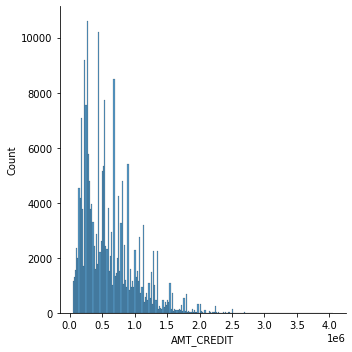

In [ ]:
### Complete in this cell: distribution of credit amounts
sns.displot(app_train["AMT_CREDIT"])

1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

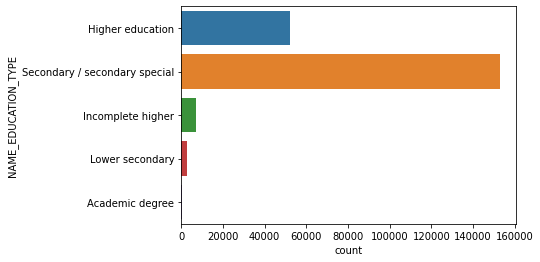

In [ ]:
### Complete in this cell: level of education plot
sns.countplot(y ="NAME_EDUCATION_TYPE", data = app_train)

In [ ]:
val_education_perc = app_train["NAME_EDUCATION_TYPE"].value_counts(normalize = True)
val_education_count = app_train["NAME_EDUCATION_TYPE"].value_counts()
val_education_table = pd.concat([val_education_count, val_education_perc], axis=1)
val_education_table.columns = ["Total Count", "Total %"]
val_education_table

,Total Count,Total %
Secondary / secondary special,153062,0.711066
Higher education,52283,0.242886
Incomplete higher,7166,0.033290
Lower secondary,2634,0.012237
Academic degree,112,0.000520


1.11. Plot the distribution of ocupation of the loan applicants

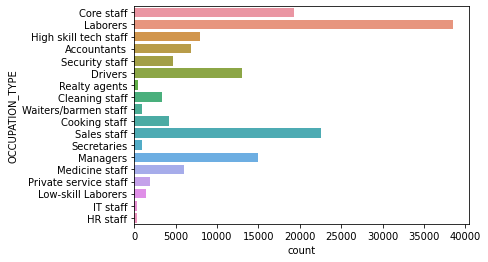

In [ ]:
### Complete in this cell: ocupation of applicants
sns.countplot(data = app_train, y = "OCCUPATION_TYPE")

1.12. Plot the family status of the applicants

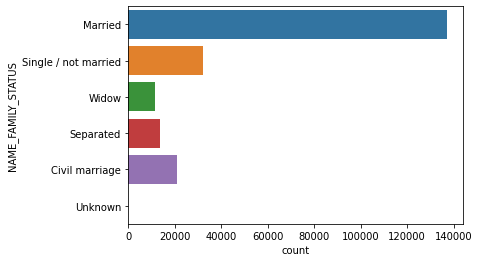

In [ ]:
### Complete in this cell: family status
sns.countplot(data = app_train, y = "NAME_FAMILY_STATUS") 

1.13. Plot the income type of applicants grouped by the target variable

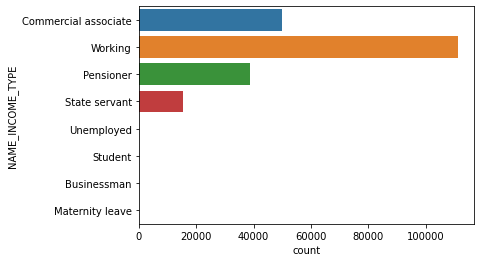

In [ ]:
### Complete in this cell: income type of applicants
sns.countplot(data = app_train, y = "NAME_INCOME_TYPE")

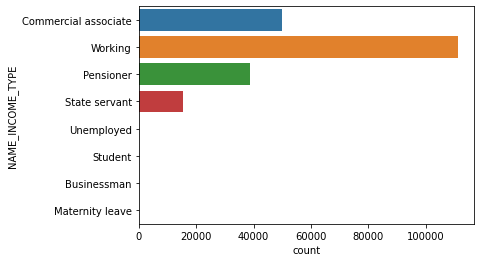

In [ ]:
### Complete in this cell: income type 
sns.countplot(data = app_train, y = "NAME_INCOME_TYPE")

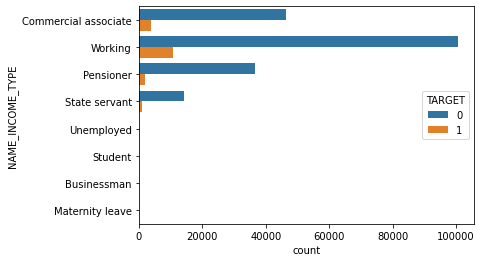

In [ ]:
### Complete in this cell: Income type of applicants by target variable
sns.countplot(data = app_train, y = "NAME_INCOME_TYPE", hue = "TARGET")

## 2. Preprocessing

2.1. The first step will be separate our train and test datasets columns between Features and Targets.

- Assign to `X_train` those columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).


In [ ]:
### Complete in this cell
X_train = app_train.loc[:, app_train.columns != "TARGET"]
y_train = app_train["TARGET"]
X_test = app_test.loc[:, app_train.columns != "TARGET"]
y_test =  app_test["TARGET"]


**Don't change anything in this cell, just make it run correctly**

In [ ]:
if X_train.shape == (215257, 122):
  print('Success: X_train shape is correct!')
else:
  raise ValueError('X_train dataset shape is incorrect, please review your code')

if isinstance(X_train, pd.DataFrame):
  print('Success: X_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if y_train.shape == (215257,) or y_train.shape == (215257, 1):
  print('Success: y_train shape is correct!')
else:
  raise ValueError('Train labels shape is incorrect, please review your code')

if X_test.shape == (92254, 122):
  print('Success: X_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(X_test, pd.DataFrame):
  print('Success: X_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

if y_test.shape == (92254,) or y_test.shape == (92254, 1):
  print('Success: y_test shape is correct!')
else:
  raise ValueError('Test labels shape is incorrect, please review your code')


Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.2. In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

**Important note:** Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns. Check `pandas.DataFrame.align()` function.

Complete the function `preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame)` following the instructions given above.

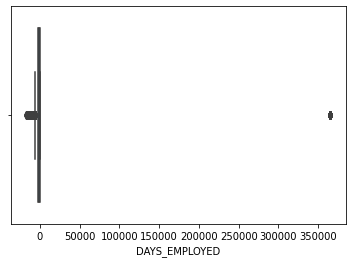

In [ ]:
sns.boxplot(app_train['DAYS_EMPLOYED'] )

In [ ]:
### Complete in this cell: Data pre processing function
def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame): #-> Tuple[np.ndarray, np.ndarray]:
  """
  Pre processes data for modeling. Receives train and testing dataframes 
  for Home Credit Competition, and returns numpy ndarrays of cleaned up 
  dataframes with feature engineering already performed.
  
  Arguments:
      train_df: pd.DataFrame
      test_df: pd.DataFrame
  """    
  # Correct anomalous values 
  train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
  train_df['DAYS_EMPLOYED'] = abs(train_df['DAYS_EMPLOYED'])
  train_df["ORGANIZATION_TYPE"].replace({"XNA": "Other"}, inplace = True)
  
  test_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
  test_df['DAYS_EMPLOYED'] = abs(test_df['DAYS_EMPLOYED'])
  test_df["ORGANIZATION_TYPE"].replace({"XNA": "Other"}, inplace = True)
  
  scaler = StandardScaler()
  
  #Replace na values with median and scale values
  for col in train_df:
    if train_df[col].dtype == 'int64' or train_df[col].dtype == "float64":
      train_df[col].fillna(train_df[col].median(), inplace = True)

      reshape = train_df[col].values.reshape(-1, 1)
      scaler.fit(reshape)
      train_df[col] = scaler.transform(reshape)
      
  #Replace na values with median and scale values
  for col in test_df:
    if test_df[col].dtype == 'int64' or test_df[col].dtype == "float64":
      test_df[col].fillna(test_df[col].median(), inplace = True)    
      
      reshape_1 = test_df[col].values.reshape(-1, 1)
      scaler.fit(reshape_1)
      test_df[col] = scaler.transform(reshape_1)
  
  lb = preprocessing.LabelBinarizer()
  
  columns_dummies_list = []
  columns_dummies_list_2 = []
  
  # Iterate through the columns
  for col in train_df:
    if train_df[col].dtype == 'object' :
    # If 2 unique categories
      if len(list(train_df[col].unique())) <= 2:
      # Train on the training data
        train_df[col] = lb.fit_transform(train_df[col])
      if len(list(train_df[col].unique())) > 2:
        columns_dummies_list.append(col)
  
  # Iterate through the columns
  for col in test_df:
    if test_df[col].dtype == 'object' :
    # If 2 unique categories
      if len(list(test_df[col].unique())) <= 2:
      # Train on the training data
        test_df[col] = lb.fit_transform(test_df[col])
      if len(list(test_df[col].unique())) > 2:
        columns_dummies_list_2.append(col)

  
  # Convert +2 unique values in categorical columns with dummies
  train_df = pd.get_dummies(train_df, columns = columns_dummies_list)
  test_df = pd.get_dummies(test_df, columns = columns_dummies_list_2)

  a, b = train_df.align(test_df, axis = 1)
  
  # Changing to array type
  c = a.to_numpy()
  d = b.to_numpy() 
  """    
  Returns:
      train_data: np.ndarrary
      test_data: np.ndarrary
  """
  # Complete this function
  return c, d

In the following cell we are going to execute the functions you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `test_data` only for the final evaluation of the model trained.

**Don't change anything in this cell, just make it run correctly**

In [ ]:
train_data, test_data = preprocess_data(X_train, X_test)

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if train_data.shape == (215257, 242):
  print('Success: train_data shape is correct!')
else:
  raise ValueError('train_data dataset shape is incorrect, please review your code')

if isinstance(train_data, np.ndarray):
  print('Success: train_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if test_data.shape == (92254, 242):
  print('Success: test_data shape is correct!')
else:
  raise ValueError('test_data dataset shape is incorrect, please review your code')

if isinstance(test_data, np.ndarray):
  print('Success: test_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')


Success: train_data shape is correct!
Success: train_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

In [ ]:
### Complete in this cell: train a logistic regression, assign to `log_reg` variable
log_reg = LogisticRegression(random_state=42)
log_reg.fit(train_data, y_train)
proba = log_reg.predict_proba(test_data)
proba  = proba[:,1]


LogisticRegression(random_state=42)

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if isinstance(log_reg, LogisticRegression):
  print('Success: Logistic regression model type is correct!')
else:
  raise ValueError('Logistic regression model type is incorrect, please review your code')

Success: Logistic regression model type is correct!


3.2. Use the trained model to predict probabilities for the test data.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1).

In [ ]:
### Complete in this cell: predict test data-
proba = log_reg.predict_proba(test_data)
proba  = proba[:,1]
proba

array([0.05630209, 0.01868419, 0.16316389, ..., 0.19213946, 0.00725355,
       0.01123356])

3.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [ ]:
y_test_array = np.array(y_test).reshape(-1, 1)

In [ ]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `lr_roc_auc` variable.
lr_roc_auc = roc_auc_score(y_test_array, proba)

At this point, the model should produce a result around 0.67 

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if isinstance(lr_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if lr_roc_auc >= 0.63:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [ ]:
### Complete in this cell: train a RandomForestClassifier
### Assgign to `rf`
rf = RandomForestClassifier(random_state=42)
rf.fit(train_data, y_train)
proba_1 = rf.predict_proba(test_data)
proba_1  = proba_1[:,1]

RandomForestClassifier(random_state=42)

3.5. Use the classifier to predict probabilities on the test set.



In [ ]:
### Complete in this cell: predict test data and store in
proba_1 = rf.predict_proba(test_data)
proba_1  = proba_1[:,1]
proba_1

array([0.03, 0.06, 0.1 , ..., 0.12, 0.07, 0.05])

3.6. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [ ]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_roc_auc` variable.
rf_roc_auc = roc_auc_score(y_test_array, proba_1)

At this point, the model should produce a result around 0.7

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if isinstance(rf_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_roc_auc >= 0.66:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


3.7. Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

Assign the trained model to `rf_random` variable.

In [ ]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination 
### of hyperparameters for a RandomForestClassifier.
### Assign the model to `rf_random`

random_grid = {
               "penalty" : ["l2", "l1", "elasticnet"],
               'alpha': [0.0001, 0.00001],
               'max_iter': [50, 100],
               'eta0': [0.01, .001]}

rf_random = RandomizedSearchCV(estimator = rf,  param_distributions = random_grid, random_state=42)

3.8. Use the classifier to predict probabilities on the test set.


In [ ]:
### Complete in this cell: predict test data and save csv
rf_random.fit(train_data, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [130, 180]},
                   random_state=42)

In [ ]:
# Predic probabilities of best hyperparameters model
proba_2  = rf_random.predict_proba(test_data)
proba_2  = proba_2[:,1]
proba_2

array([0.04389642, 0.03682788, 0.09648793, ..., 0.08764154, 0.04418386,
       0.04485132])

3.9. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_tuned_roc_auc` variable.

In [ ]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_tuned_roc_auc` variable.
rf_tuned_roc_auc = roc_auc_score(y_test_array, proba_2)

At this point, the model should produce a result around 0.7 or higher.

**Don't change anything in this cell, just make it run correctly**

In [ ]:
if isinstance(rf_tuned_roc_auc, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_tuned_roc_auc >= 0.7:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


3.10. Optional: If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

3.11. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [ ]:
### Complete in this cell: train a LightGBM model


### Optional: Using Scikit Learn Pipelines 

3.12. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training
